<a href="https://colab.research.google.com/github/sultan2003-del/Bayes-labs-assignments/blob/main/Copy_of_MLConcepts_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Introduction**



Clustering and dimensionality reduction are fundamental techniques in machine learning, widely used in applications such as customer segmentation, image compression, anomaly detection, and feature engineering.

- **K-Means Clustering** is an unsupervised learning algorithm that groups data points into \( K \) clusters based on similarity.
- **Principal Component Analysis (PCA)** reduces the dimensionality of data while preserving its variance, making it easier to visualize and analyze.

#### **Our Use**

In [ ]:
# @title
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.0 MB/s eta 0:00:00


In [ ]:
# @title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from faker import Faker
import random

fake = Faker()
n_samples = 10000

# Generate synthetic customer data
data = {
    "CustomerID": [fake.uuid4() for _ in range(n_samples)],
    "Age": np.random.randint(18, 70, n_samples),
    "Gender": np.random.choice(["Male", "Female"], n_samples),
    "Annual_Income": np.random.randint(20000, 150000, n_samples),
    "Spending_Score": np.random.randint(1, 100, n_samples),
    "Purchase_Frequency": np.random.randint(1, 20, n_samples),
    "Total_Transactions": np.random.randint(5, 100, n_samples),
    "Last_Purchase_Amount": np.random.uniform(10, 1000, n_samples),
    "Preferred_Category": np.random.choice(["Electronics", "Fashion", "Groceries", "Furniture", "Sports"], n_samples)
}

df = pd.DataFrame(data)
df.to_csv('synthetic_customer_data.csv', index=False)
df.head()


,CustomerID,Age,Gender,Annual_Income,Spending_Score,Purchase_Frequency,Total_Transactions,Last_Purchase_Amount,Preferred_Category
0,6a1b89ab-31cf-4734-a1c1-081a8ed50785,51,Male,136991,47,13,69,725.577515,Fashion
1,ea5ff770-a059-418f-ac29-cc0be87a72c0,64,Female,86895,21,11,79,919.891999,Furniture
2,e22d5dac-7033-41f4-8fb9-b9dc488575ec,68,Male,109505,16,5,16,771.372878,Groceries
3,962460fb-ac85-4278-a11f-4e52bb158582,35,Female,85074,31,13,62,18.920011,Furniture
4,1c9f98b3-54a4-476f-a691-abb0c78fcd38,66,Male,103461,3,6,26,781.490201,Furniture


## **Section 1: K-Means Clustering**

#### **Understanding K-Means Clustering**
---
K-Means is an iterative clustering algorithm that partitions data into \( K \) distinct, non-overlapping clusters.


#### **Mathematical Formulation**
---
The goal is to minimize intra-cluster variance:
$$
J = \sum_{i=1}^{k} \sum_{x ∈ C_i} || x - \mu_i ||^2
$$

where:
- $C_i$ is cluster $i$
- $\mu_i$ is the centroid of $C_i$
- $|| x - \mu_i ||^2$ is the squared Euclidean distance


#### **Real-World Example: Customer Segmentation**
---
Imagine a retail company wants to group customers based on spending habits. **K-Means** helps by clustering similar customers, enabling targeted marketing.

#### **K-Means Implementation**

In [ ]:
# Load dataset

df = pd.read_csv('synthetic_customer_data.csv')
X = df.drop(columns=["CustomerID", "Gender", "Preferred_Category"])

In [ ]:
# Standardize features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Apply K-Means

kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Interactive Cluster Visualization

# Reduce dimensions for visualization
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
df['PCA_1'], df['PCA_2'] = X_pca[:, 0], X_pca[:, 1]

fig = px.scatter(df, x='PCA_1', y='PCA_2', color=df['KMeans_Cluster'].astype(str), title="K-Means Clustering Visualization",
                 labels={'color': 'Cluster'}, opacity=0.8)
fig.show()


## **Section 2: Principal Component Analysis (PCA)**

#### **Understanding PCA**
---
Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of data while preserving variance.

#### **Mathematical Formulation**
---

- Compute the covariance matrix:
$$
σ = \frac{1}{n} ∑_{i=1}^{n} (x_i - \bar{x})(x_i - \bar{x})^T
$$
- Compute eigenvalues and eigenvectors:
$$
σ v = λ v
$$
Where:
  - $v$ are eigenvectors (principal components)
  - $λ$ are eigenvalues (variance explained)

#### **Real-World Example: Image Compression**
---
In facial recognition systems, PCA reduces high-dimensional image data, retaining only the most important features for classification.

#### **PCA Implementation**

In [ ]:
# Load dataset

df = pd.read_csv('synthetic_customer_data.csv')
X = df.drop(columns=["CustomerID", "Gender", "Preferred_Category"])

In [ ]:
# Standardize features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=[f'PC_{i+1}' for i in range(2)])
explained_variance = pca.explained_variance_ratio_

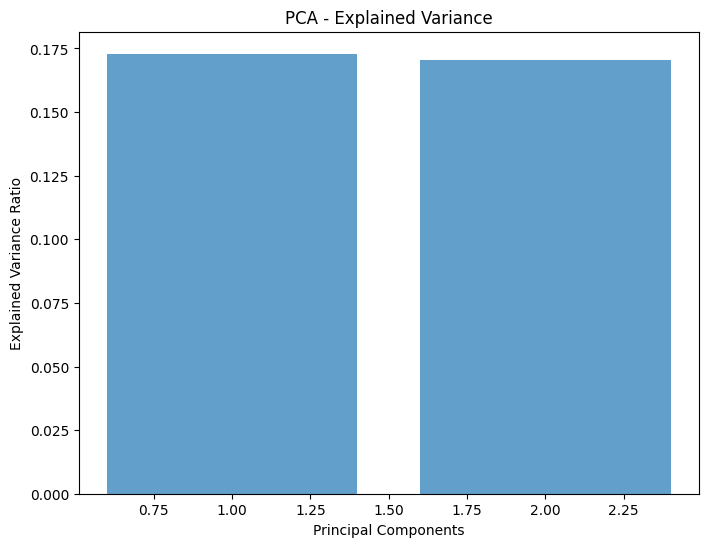

In [ ]:
# Explained Variance Visualization

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA - Explained Variance")
plt.show()

## **Section 3: Assignments**

#### **Beginner Assignment**
- Run K-Means with different values of \( K \) and observe changes in clusters.
- Modify PCA components and analyze variance explained.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("StudentStudyHours.csv")


X = data[["StudyHours"]]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


def run_kmeans(X, max_k=10):
    wcss = []
    for k in range(1, max_k + 1):
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        model.fit(X)
        wcss.append(model.inertia_)


    plt.plot(range(1, max_k + 1), wcss, marker='o')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("WCSS")
    plt.title("Elbow Method for K Selection")
    plt.show()

run_kmeans(X_scaled)

def analyze_pca(X, components=2):
    pca = PCA(n_components=components)
    X_transformed = pca.fit_transform(X)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    print(f"Explained variance with {components} components: {explained_variance:.2f}")
    return X_transformed

X_pca = analyze_pca(X_scaled)



#### **Advanced Assignment**
- Apply PCA on a real-world dataset (e.g., MNIST) and compare clustering before/after PCA.
- Implement spectral clustering and compare its performance with K-Means

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml


print("Loading MNIST dataset...")
mnist = fetch_openml("mnist_784", version=1, parser="auto")
X_mnist = mnist.data / 255.0


def run_kmeans(X, n_clusters=10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    return kmeans.inertia_


print("Running K-Means before PCA...")
kmeans_before_pca = run_kmeans(X_mnist)
print("WCSS Before PCA:", kmeans_before_pca)


print("Applying PCA...")
pca = PCA(n_components=50)
X_mnist_pca = pca.fit_transform(X_mnist)
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained variance with 50 components: {explained_variance:.2f}")


print("Running K-Means after PCA...")
kmeans_after_pca = run_kmeans(X_mnist_pca)
print("WCSS After PCA:", kmeans_after_pca)


print("Running Spectral Clustering...")
spectral = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', random_state=42)
y_spectral = spectral.fit_predict(X_mnist_pca)
print("Spectral Clustering Completed.")

